<a href="https://colab.research.google.com/github/maoya23/machinelearning/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 28, 28)
0 255
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


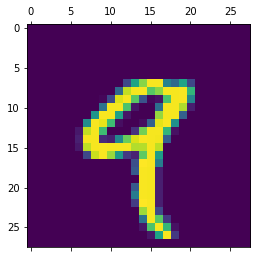

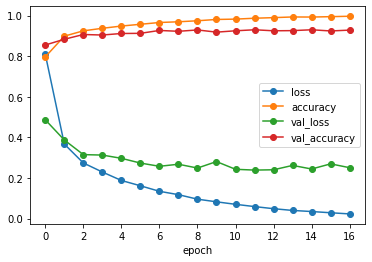

313/313 [==============================] - 1s 3ms/step - loss: 0.2200 - accuracy: 0.9396
[0.21999892592430115, 0.9395999908447266]


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from random import sample
from keras import callbacks,layers,models
from sklearn.metrics import confusion_matrix

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
print(x_train.shape)

np.set_printoptions(linewidth=170)
x_train[4, :, :]
plt.matshow(x_train[4, :, :])

print(x_train.min(),x_train.max())

x_train=x_train/255  #画素は0から255の256段階で表しているので255で割ることで0から1の範囲で表すことができる（正規化）
x_test=x_test/255

my_index=sample(range(60000),6000)  #
x_train=x_train[my_index, :, :]
y_train=y_train[my_index]

my_model=models.Sequential()
my_model.add(layers.Flatten(input_shape=[28,28])) #layers.flattenで28×28の二次元データを一次元に変換している。
my_model.add(layers.Dense(units=256,activation='relu')) #0から255の数値で輝度を表しているので中間層は256個の層が必要。
my_model.add(layers.Dense(units=10,activation='softmax'))  #出力層は0から9の数字を判別するために10個必要。

print(my_model.summary())

my_model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

my_cb=callbacks.EarlyStopping(patience=5,restore_best_weights=True)

my_history=my_model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=20,
    callbacks=[my_cb],
    verbose=0)

tmp=pd.DataFrame(my_history.history)  #損失関数と正解率の変化を可視化する。
tmp.plot(xlabel='epoch',style='o-')
plt.show()

print(my_model.evaluate(x=x_test,y=y_test))